In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_students=pd.read_parquet('students.parquet', engine='pyarrow', dtype_backend='pyarrow')
df_students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


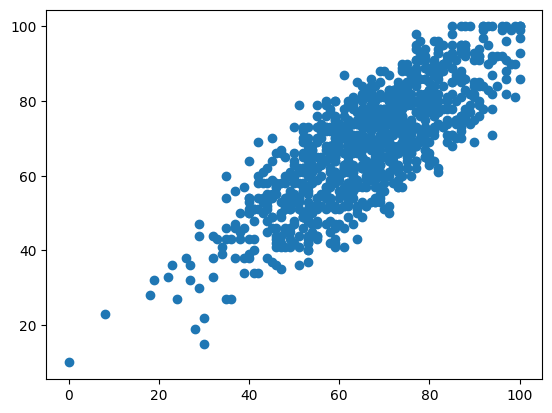

In [4]:
plt.scatter(df_students['math score'], df_students['writing score'])

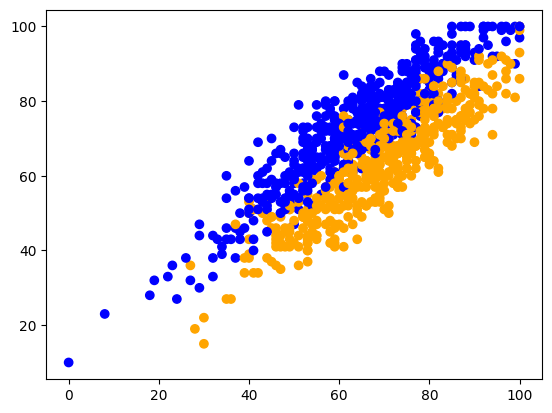

In [5]:
#plt.scatter(x='math score', y='writing score', data=df_students, hue='gender')
plt.scatter(df_students['math score'], df_students['writing score'], c=df_students['gender'].map({'male':'orange','female':'blue'}))

In [14]:
df_students.describe()

,math score,reading score,writing score
count,1000.0,1000.0,1000.0
mean,66.089,69.169,68.054
std,15.16308,14.600192,15.195657
min,0.0,17.0,10.0
25%,57.0,59.0,57.75
50%,66.0,70.0,69.0
75%,77.0,79.0,79.0
max,100.0,100.0,100.0


In [25]:
df_student_stats=pd.DataFrame(df_students.describe())
df_student_stats=df_student_stats.loc[['mean','50%']]
df_student_stats


,math score,reading score,writing score
mean,66.089,69.169,68.054
50%,66.0,70.0,69.0


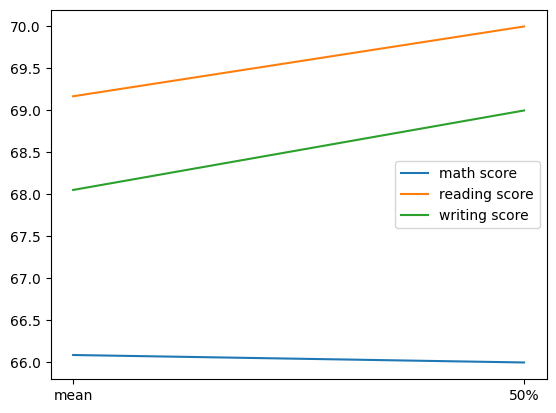

In [38]:
plt.plot(df_student_stats)
#plt.plot(x, y, linestyle="-", marker="o", label="Expenses")
plt.legend(df_student_stats.columns)
plt.show()

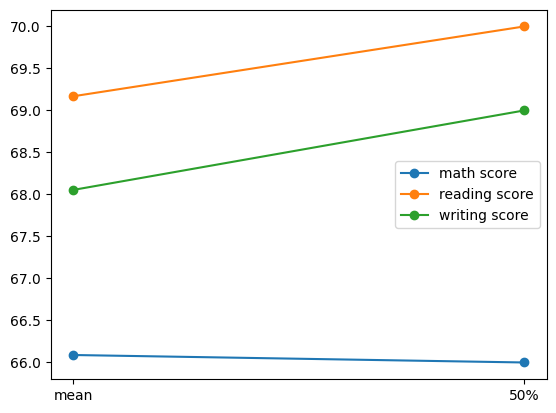

In [29]:
plt.plot(df_student_stats,  marker="o")
#plt.plot(x, y, linestyle="-", marker="o", label="Expenses")
plt.legend(df_student_stats.columns)
plt.show()

<AxesSubplot: >

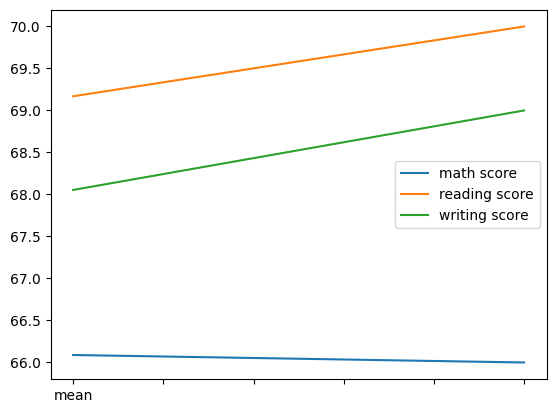

In [24]:
df_student_stats.plot()